# Medical Imaging
### 23 May 2022
### Lab 4

Consider the study of a sample with $ T_1 / T_2 $ = 1400 ms / 90 ms by 1H-NMR in a 3T static magnetic field, using the rotating reference frame and assuming on-resonance spins. Consider the equilibrium magnetization vector $ M_0 $ = [0; 0; 1] and simulate the evolution of the magnetization vector (displaying the time course of each of its components) using a time step of 0.05 ms in the following conditions:

In [35]:
global delT = 0.05 / 1000;
global T_1 = 1400 / 1000;
global T_2 = 90 / 1000;
global g = 42.58*10^6;

In [33]:
function [M] = activate(t, gyr, theta, M_0)    
    delT = 0.05 / 1000;

    theta = deg2rad(theta);
    B_1 = theta / (gyr*t);

    M_z = [];
    M_y = [];
    M_x = [];

    niter = t / delT;
    m = M_0;
    for i = 1:niter
        m_new = [cos(gyr*B_1*delT) , 0, sin(gyr*B_1*delT);
                 0                 , 1, 0                ;
                 -sin(gyr*B_1*delT), 0, cos(gyr*B_1*delT);]*m;
        M_x(i) = m_new(1);
        M_y(i) = m_new(2);
        M_z(i) = m_new(3);
        
        m = m_new;
    end
    
    M = m;
    
    f1 = figure('Position', [0, 0, 600, 300])
    title("M_x");
    plot(1:niter, M_x);

    f2 = figure('Position', [0, 0, 600, 300])
    title("M_y");
    plot(1:niter, M_y);

    f3 = figure('Position', [0, 0, 600, 300])
    title("M_z");
    plot(1:niter, M_z);
end

In [34]:
function [M_x, M_y, M_z] = relax(t, theta, T_1, T_2, M_0)
    delT = 0.05 / 1000;

    M_x = [];
    M_y = [];
    M_z = [];

    niter = t / delT;
    m = M_0;
    for i = 1:niter
        m_new = [exp(-delT/T_2) , 0             , 0             ;
                 0              , exp(-delT/T_2), 0             ;
                 0              , 0             , exp(-delT/T_1);]*m + [0; 0; norm(M_0)*(1 - (exp(-delT/T_1)))];
        M_x(i) = m_new(1);
        M_y(i) = m_new(2);
        M_z(i) = m_new(3);
        m = m_new;
    end
    
    f1 = figure('Position', [0, 0, 600, 300])
    title("M_x");
    plot(1:niter, M_x);

    f2 = figure('Position', [0, 0, 600, 300])
    title("M_y");
    plot(1:niter, M_y);

    f3 = figure('Position', [0, 0, 600, 300])
    title("M_z");
    plot(1:niter, M_z);
    
end

#### 1. Excitation (ignoring relaxation) by a 90º flip angle B1 pulse along -y with duration 5 ms.

f1 = 14l
f2 = 2
f3 = 3
finalM =

   1.0000
        0
  -0.0000



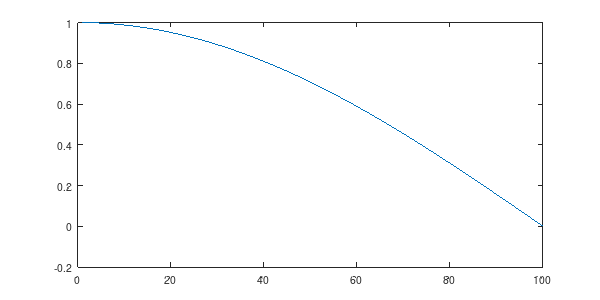

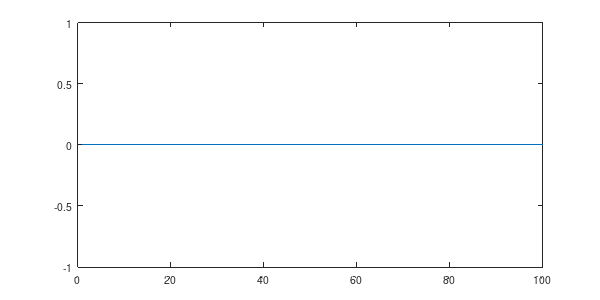

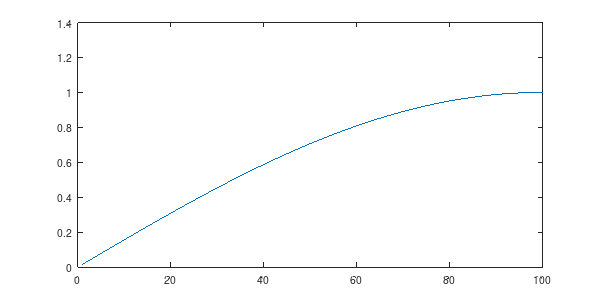

In [36]:
finalM = activate(5/1000, 42.58*10^6, 90, [0; 0; 1]);
finalM

#### 2. Relaxation following the 90º excitation simulated in 1., for an observation period of 790 ms. Try also an observation period of 3000 ms.

f1 = 14l
f2 = 2
f3 = 3


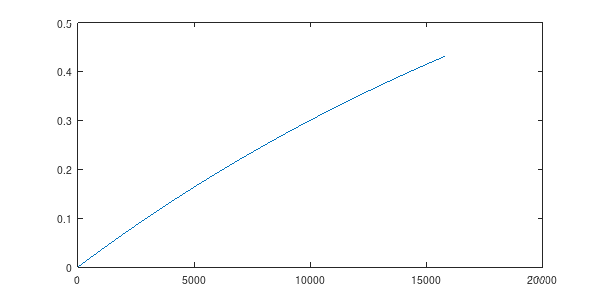

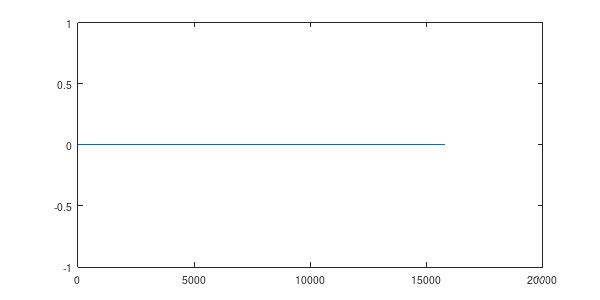

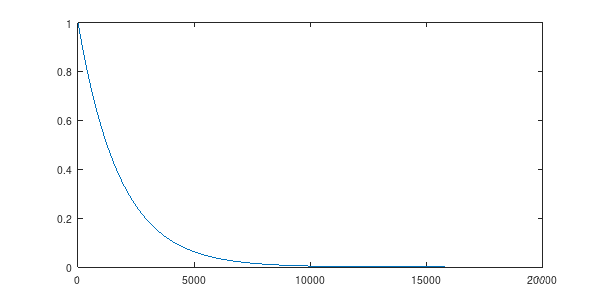

In [37]:
relax(790/1000, 90, T_1, T_2, finalM);

f1 = 14l
f2 = 2
f3 = 3


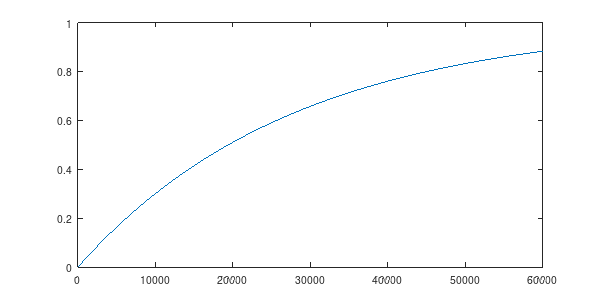

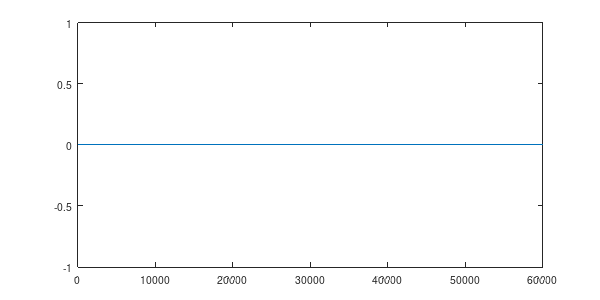

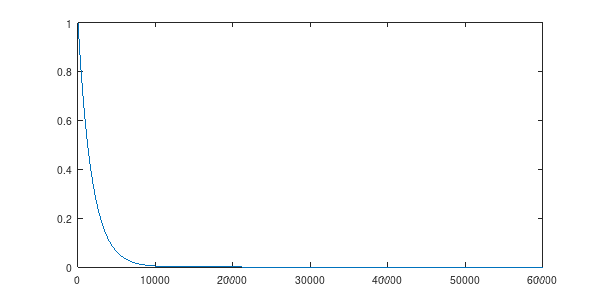

In [38]:
relax(3000/1000, 90, T_1, T_2, finalM);

#### 3. Repeat 1. 2. for the flip angles 45º and 180º.

f1 = 14l
f2 = 2
f3 = 3


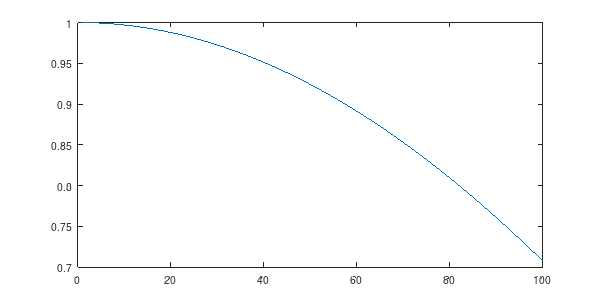

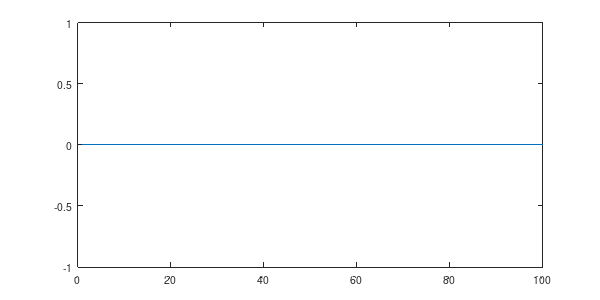

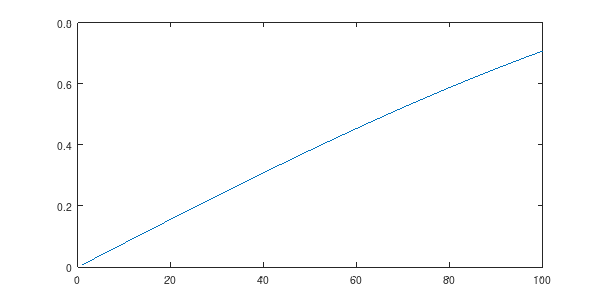

In [39]:
## Activation 5 ms & 45 deg
finalM45 = activate(5/1000, 42.58*10^6, 45, [0; 0; 1]);

f1 = 14l
f2 = 2
f3 = 3


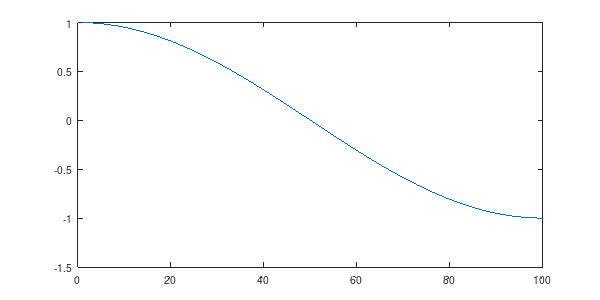

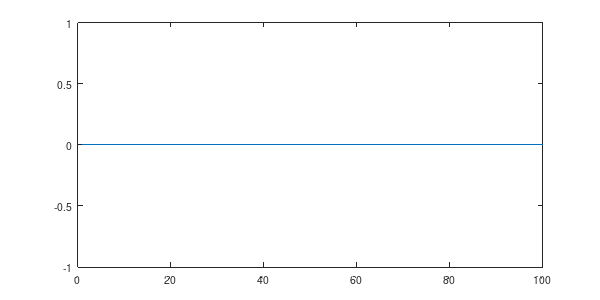

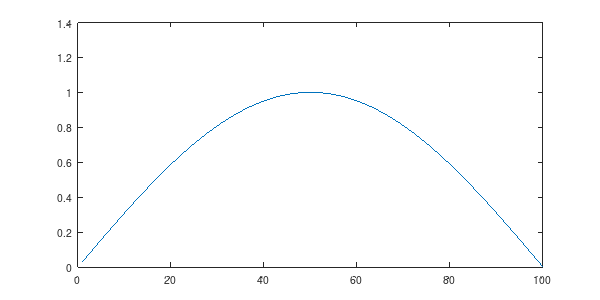

In [40]:
## Activation 5 ms & 180 deg
finalM180 = activate(5/1000, 42.58*10^6, 180, [0; 0; 1]);

f1 = 14l
f2 = 2
f3 = 3


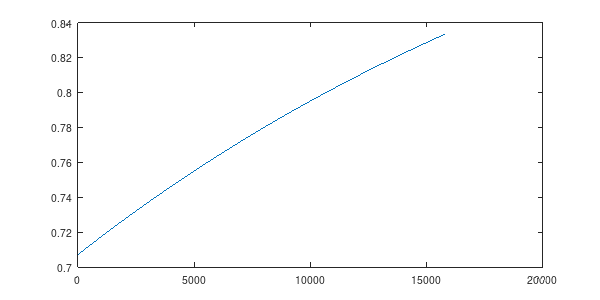

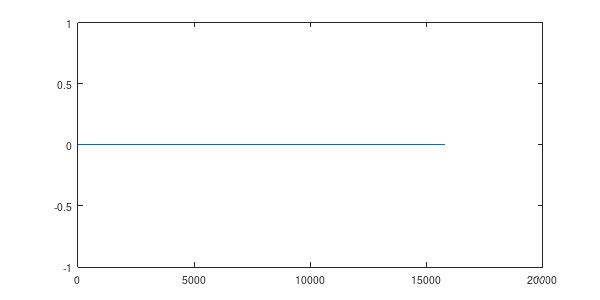

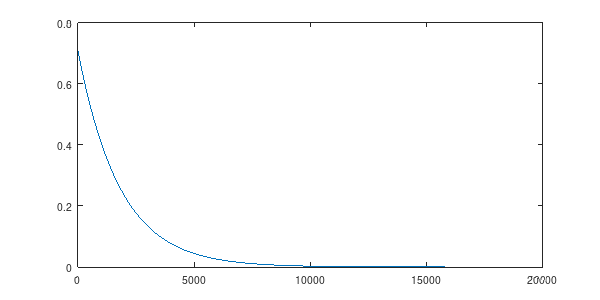

In [44]:
## Relaxation 45 deg & 790 ms
relax(790/1000, 45, T_1, T_2, finalM45);

f1 = 14l
f2 = 2
f3 = 3


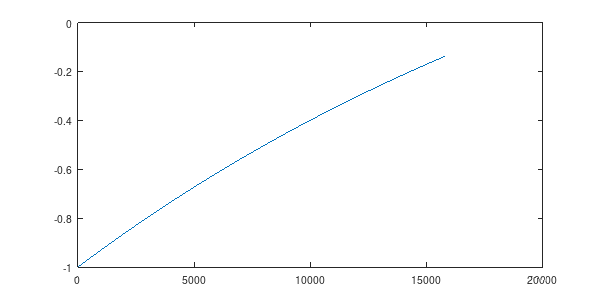

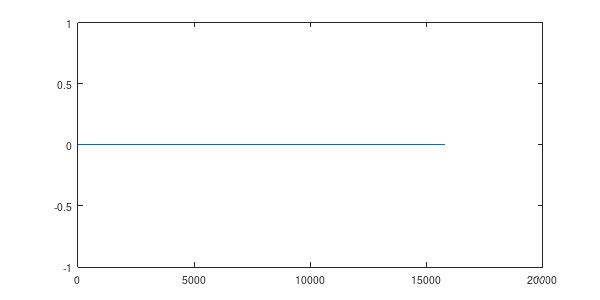

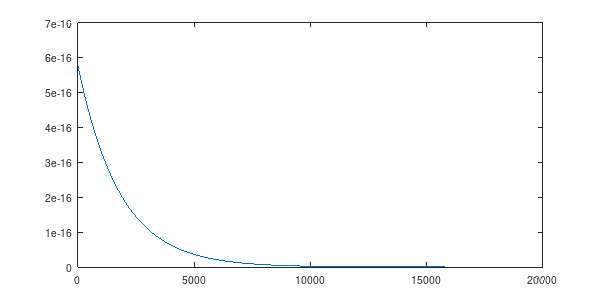

In [45]:
## Relaxation 180 deg & 790 ms
relax(790/1000, 180, T_1, T_2, finalM180);


f1 = 14l
f2 = 2
f3 = 3


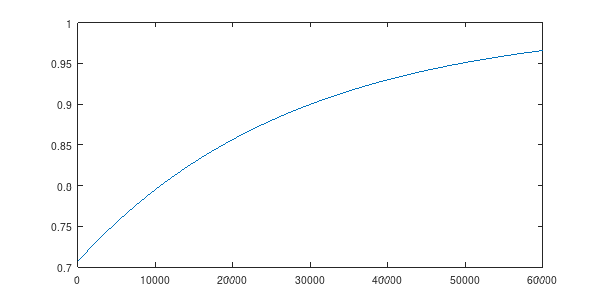

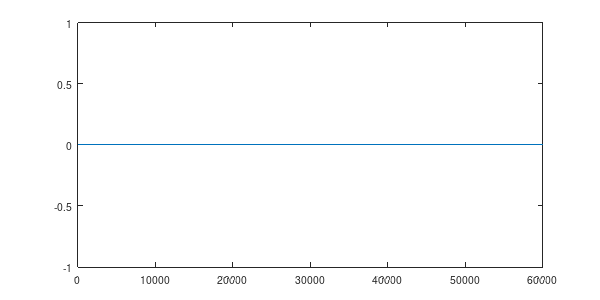

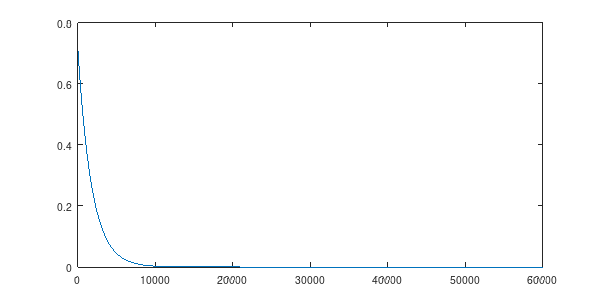

In [41]:
## Relaxation 45 deg & 3000 ms
relax(3000/1000, 45, T_1, T_2, finalM45);

f1 = 14l
f2 = 2
f3 = 3


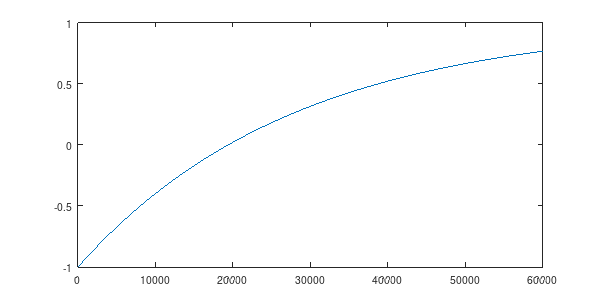

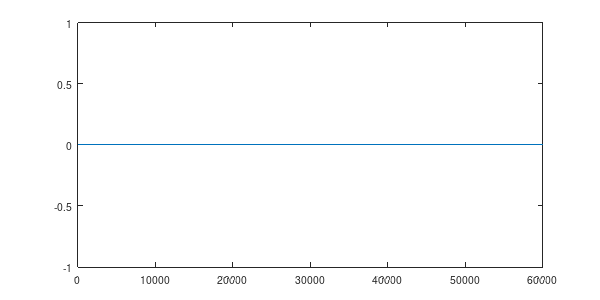

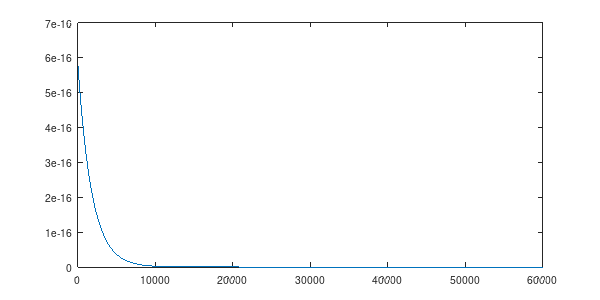

In [42]:
## Relaxation 180 deg & 3000 ms
relax(3000/1000, 180, T_1, T_2, finalM180);

#### 4. Now repeat 3. for a flip angle of 45º, over 10 consecutive cycles of excitation and relaxation (repetition time (TR) = 790 ms).

M_0 =04h

   0
   0
   1

1590014h
1590004h
f = 104h
f = 204h
f = 304h


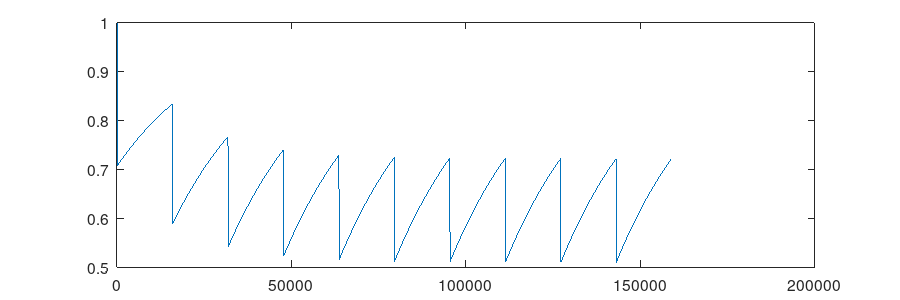

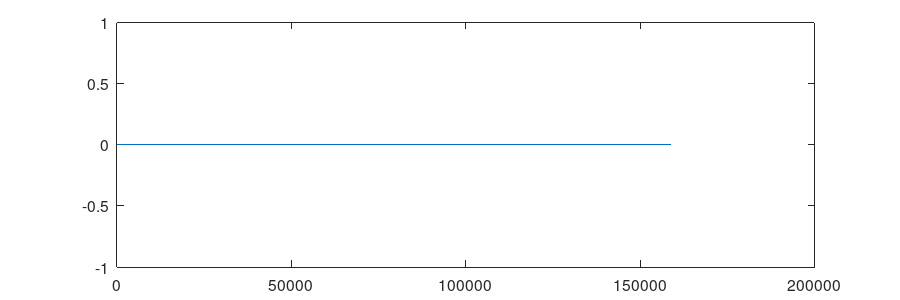

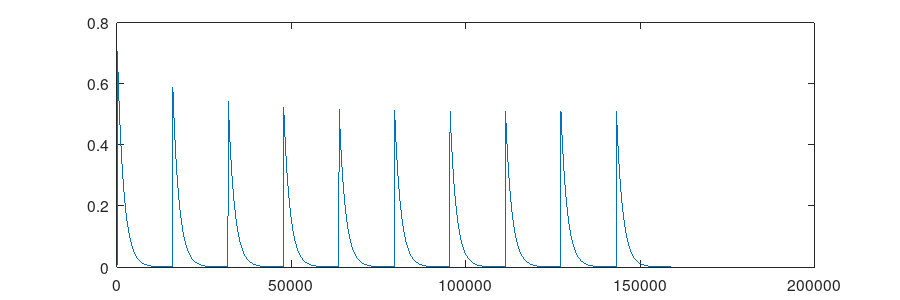

In [55]:
delT = 0.05 / 1000;

theta = deg2rad(45);
B_1 = theta / (g*(5/1000));

M_0 = [0; 0; 1]
M_z = [];
M_y = [];
M_x = [];

j = 1;
niter1 = (5/1000) / delT;
niter2 = (790/1000) / delT;

m = M_0;
for k = 1:10
    for i = 1:niter1
        m_new = [cos(g*B_1*delT) , 0, sin(g*B_1*delT);
                 0               , 1, 0              ;
                 -sin(g*B_1*delT), 0, cos(g*B_1*delT);]*m;
        M_x(j) = m_new(1);
        M_y(j) = m_new(2);
        M_z(j) = m_new(3);

        m = m_new;
        j = j+1;
    end

%     m = M_0;
    for i = 1:niter2
        m_new = [exp(-delT/T_2) , 0             , 0             ;
                 0              , exp(-delT/T_2), 0             ;
                 0              , 0             , exp(-delT/T_1);]*m + [0; 0; norm(M_0)*(1 - (exp(-delT/T_1)))];
        M_x(j) = m_new(1);
        M_y(j) = m_new(2);
        M_z(j) = m_new(3);
        m = m_new;

        j = j + 1;
    end
end

disp(j);
disp(length(M_x));

f = figure('Position', [0, 0, 900, 300])
title("M_x")
plot(M_x)

f = figure('Position', [0, 0, 900, 300])
title("M_y")
plot(M_y)

f = figure('Position', [0, 0, 900, 300])
title("M_z")
plot(M_z)